In [ ]:
%%capture
import numpy as np
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout

from GAN_MNIST import *

In [ ]:
# load image data
dataset = load_real_samples()

In [ ]:
latent_dim = 100
G = Generator(latent_dim)
D = Discriminator()
gan = GAN(G, D)

100%|██████████| 468/468 [00:18<00:00, 26.00it/s]


>1, d=0.666, g=0.708


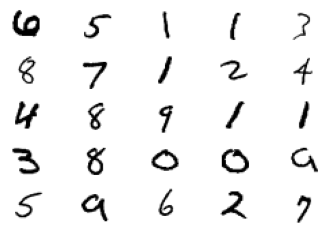

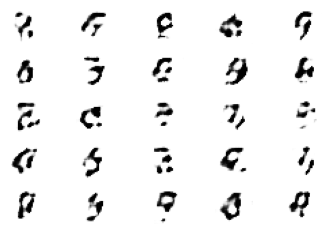

100%|██████████| 468/468 [00:17<00:00, 26.24it/s]


>2, d=0.674, g=0.680


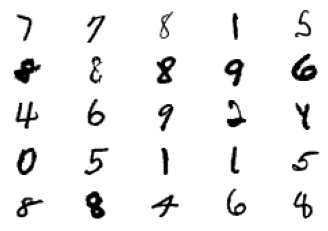

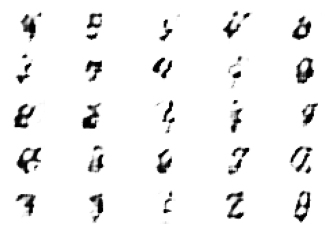

100%|██████████| 468/468 [00:17<00:00, 26.03it/s]


>3, d=0.676, g=0.682


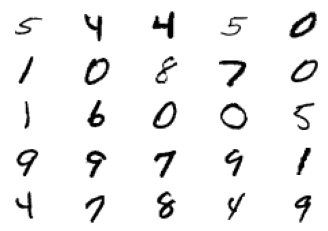

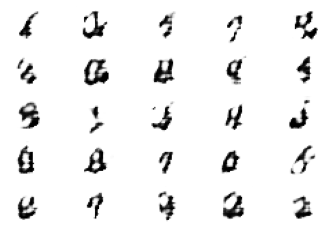

100%|██████████| 468/468 [00:18<00:00, 25.87it/s]


>4, d=0.673, g=0.756


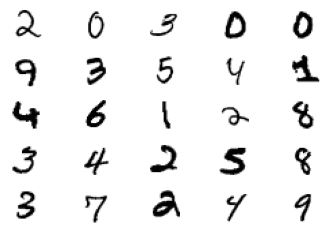

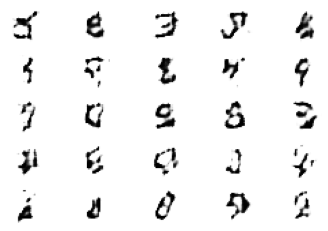

100%|██████████| 468/468 [00:17<00:00, 26.17it/s]


>5, d=0.691, g=0.695


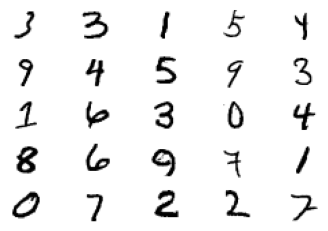

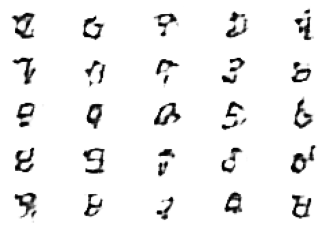

100%|██████████| 468/468 [00:17<00:00, 26.13it/s]


>6, d=0.683, g=0.697


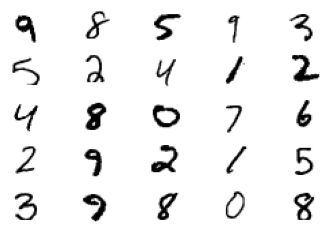

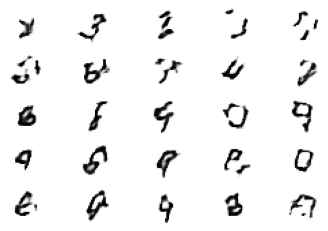

100%|██████████| 468/468 [00:17<00:00, 26.19it/s]


>7, d=0.689, g=0.693


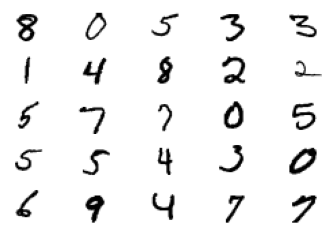

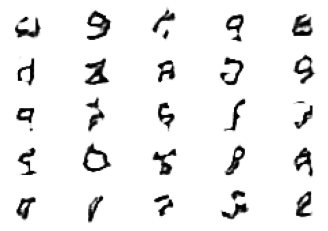

100%|██████████| 468/468 [00:18<00:00, 25.68it/s]


>8, d=0.686, g=0.693


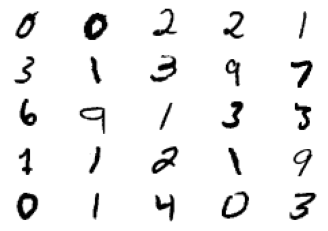

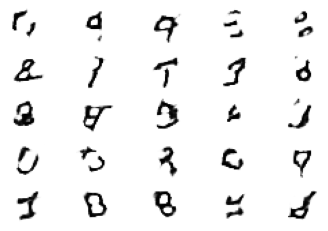

100%|██████████| 468/468 [00:18<00:00, 25.71it/s]


>9, d=0.686, g=0.724


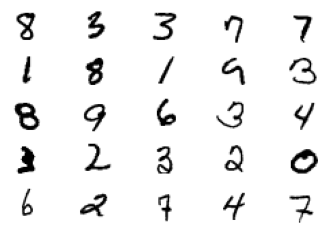

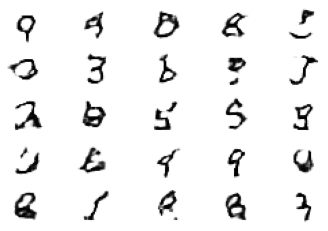

100%|██████████| 468/468 [00:18<00:00, 25.83it/s]


>10, d=0.695, g=0.659


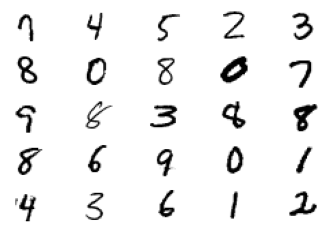

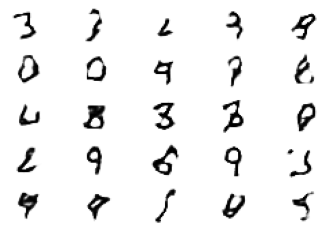

100%|██████████| 468/468 [00:18<00:00, 25.68it/s]


>11, d=0.686, g=0.701


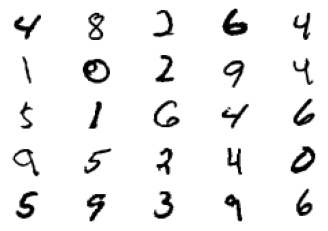

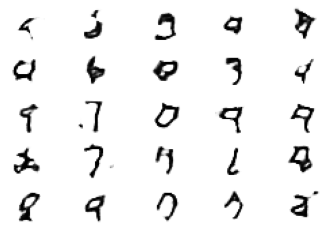

100%|██████████| 468/468 [00:18<00:00, 25.75it/s]


>12, d=0.685, g=0.650


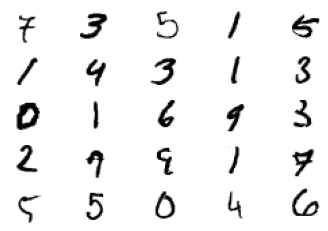

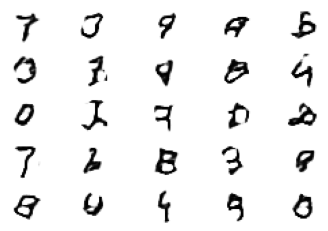

In [5]:
# train model
batch_size = 128
n_epochs = 12
n_batch = int(dataset.shape[0] / batch_size)

for i in range(n_epochs):
    for j in tqdm(range(n_batch)):
        x_img, y_img = generate_dcm_batch(G, dataset, batch_size, latent_dim)
        d_loss, _ = D.train_on_batch(x_img, y_img)

        x_hid, y_hid = generate_gan_batch(latent_dim, batch_size)
        g_loss = gan.train_on_batch(x_hid, y_hid)  # the D is frozen in gan

    # summarize loss on this epoch
    print('>%d/%d, disc_loss=%.3f, gan_loss=%.3f' % (i + 1, n_epochs, d_loss, g_loss))
    x_img_make = G.predict(np.random.randn(batch_size, latent_dim))
    show_plot(x_img, 5)
    show_plot(x_img_make, 5)